<a href="https://colab.research.google.com/github/phamvandatspkt/nhandangmonan/blob/main/nhandientienmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from google.colab import drive
drive.mount('/content/drive')
folder= '/content/drive/MyDrive/tiengiay/tiengiay/CurrencyDetectionImage/'

 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/tiengiay/tiengiay/CurrencyDetectionImage/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('200dong'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('500dong'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('1000dong'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('2000dong'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('5000dong'):
    output = 4
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('10000dong'):
    output = 5
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('20000dong'):
    output = 6
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('50000dong'):
    output = 7
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('100000dong'):
    output = 8
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('200000dong'):
    output = 9
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('500000dong'):
    output = 10
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('11TienGiay_photos.npy', photos)
save('11TienGiay_labels.npy', labels)

(110, 200, 200, 3) (110,)


In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                 input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(11, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(photos, labels, epochs=20, verbose=1)

Epoch 1/20
4/4 [==============================] - 11s 2s/step - loss: 3208.0222 - accuracy: 0.1000
Epoch 2/20
4/4 [==============================] - 9s 2s/step - loss: 723.4967 - accuracy: 0.1000
Epoch 3/20
4/4 [==============================] - 9s 2s/step - loss: 50.4969 - accuracy: 0.2000
Epoch 4/20
4/4 [==============================] - 9s 2s/step - loss: 12.0925 - accuracy: 0.2455
Epoch 5/20
4/4 [==============================] - 9s 2s/step - loss: 3.0964 - accuracy: 0.3636
Epoch 6/20
4/4 [==============================] - 9s 2s/step - loss: 1.5077 - accuracy: 0.4909
Epoch 7/20
4/4 [==============================] - 9s 2s/step - loss: 1.2432 - accuracy: 0.5909
Epoch 8/20
4/4 [==============================] - 9s 2s/step - loss: 0.8779 - accuracy: 0.7182
Epoch 9/20
4/4 [==============================] - 9s 2s/step - loss: 0.6013 - accuracy: 0.8182
Epoch 10/20
4/4 [==============================] - 9s 2s/step - loss: 0.3396 - accuracy: 0.9000
Epoch 11/20
4/4 [========================

In [19]:

model.evaluate(photos,labels)

4/4 [==============================] - 2s 553ms/step - loss: 0.0090 - accuracy: 1.0000


[0.009046831168234348, 1.0]

In [ ]:
model.save('11TienGiay_Final.h5')

In [20]:
from keras.models import load_model
models=load_model('11TienGiay_Final.h5')

In [21]:
classes = ["200dong","500dong","1000dong","2000dong","5000dong","10000dong","20000dong","50000dong","100000dong","200000dong","500000dong"]

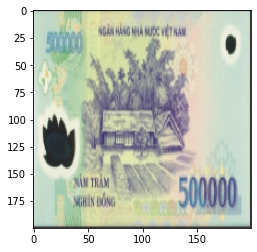

In [22]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('/content/drive/MyDrive/tiengiay/tiengiay/CurrencyDetectionImage/500000dong1.jpg', target_size=(200,200))
plt.imshow(img)

In [23]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.0889001  0.08993596 0.08807816 0.08916935 0.09063742 0.09355953
  0.09257511 0.08569589 0.09052236 0.09263326 0.09829289]]


'500000dong'